In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.linalg as sp

In [2]:
test_img = plt.imread('76.jpg',0)
test_img = np.array(test_img,dtype = np.float64)

In [3]:
test_img.shape

(256, 256)

Text(0.5, 1.0, 'Original image')

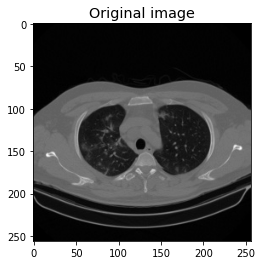

In [4]:
plt.imshow(test_img,cmap='gray')
plt.title("Original image",size='x-large')

# Eigenvalue Decomposition

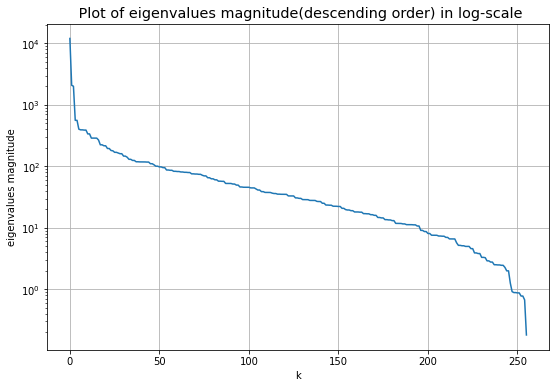

In [7]:
def evd_rct(test_img,k=100):                            #returns the image reconstructed  using evd
  eigval,eigvec = np.linalg.eig(test_img)
  order = np.absolute(eigval).argsort()[::-1]
  eigval = eigval[order]
  eigvec = eigvec[:,order]
  img_rct = np.dot(np.dot(eigvec[:,:k],np.diag(eigval[:k])),np.linalg.inv(eigvec)[:k,:])
  return [eigval,eigvec,img_rct]

eigvals = evd_rct(test_img)[0]
plt.figure(figsize=(9,6))
plt.plot(np.absolute(eigvals))
plt.title(" Plot of eigenvalues magnitude(descending order) in log-scale",size='x-large')
plt.yscale('log')
plt.xlabel("k")
plt.ylabel("eigenvalues magnitude")
plt.grid()

In [8]:

x1=[]
x2=[]
y1=[]
y2=[]
eigvals=evd_rct(test_img,256)[0]
for i in range(1,257):
  if np.absolute(np.imag(np.sum(eigvals[:i]))) < 1e-10:
    x1.append(i)                                  #benign index, all conjugate pairs included
    y1.append(np.count_nonzero(np.imag(evd_rct(test_img,i)[2])<=1e-10)/(256*2.56))
  else:
    x2.append(i)
    y2.append(np.count_nonzero(np.imag(evd_rct(test_img,i)[2])<=1e-10)/(256*2.56))



Text(0.5, 0.98, '% of pixels having imaginary part almost zero in reconstructed images')

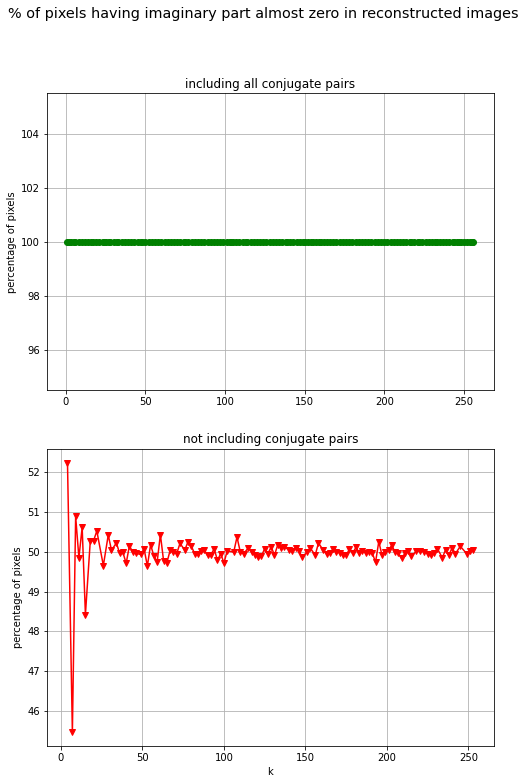

In [9]:
#plotting % of pixels having imaginary part nearly zero
plt.figure(figsize=(8,12))
plt.subplot(211)
plt.plot(x1,y1,marker='o',color='green')
plt.title("including all conjugate pairs")
plt.ylabel("percentage of pixels")
plt.grid()
plt.subplot(212)
plt.plot(x2,y2,marker='v',color='red')
plt.xlabel("k")
plt.ylabel("percentage of pixels")
plt.title("not including conjugate pairs")
plt.grid()
plt.suptitle("% of pixels having imaginary part almost zero in reconstructed images",size='x-large')

In [45]:
#the indices in 
defect = [np.where(np.array(y1)!=100)[0]]
print(defect)


[array([], dtype=int64)]


there are no defects

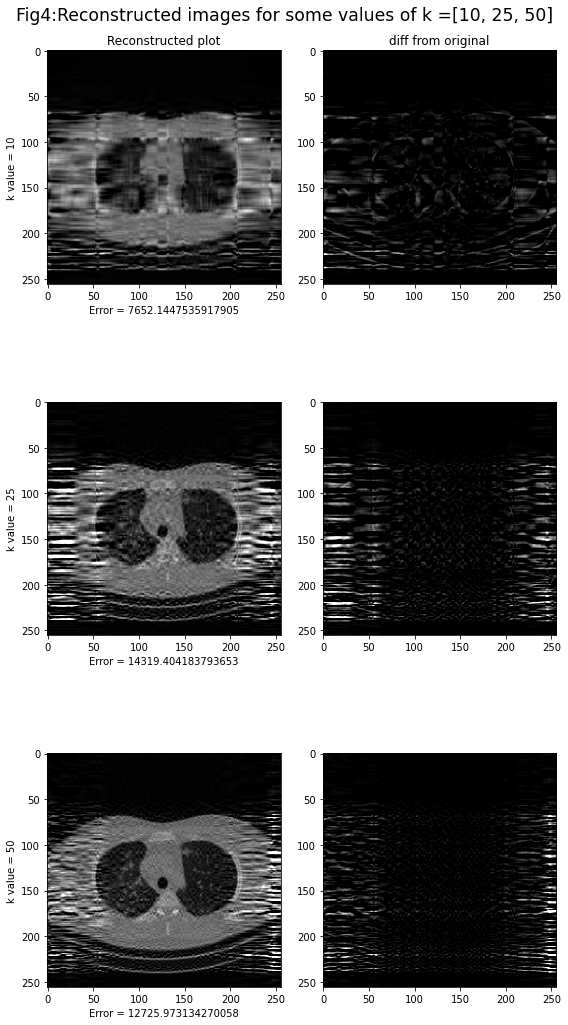

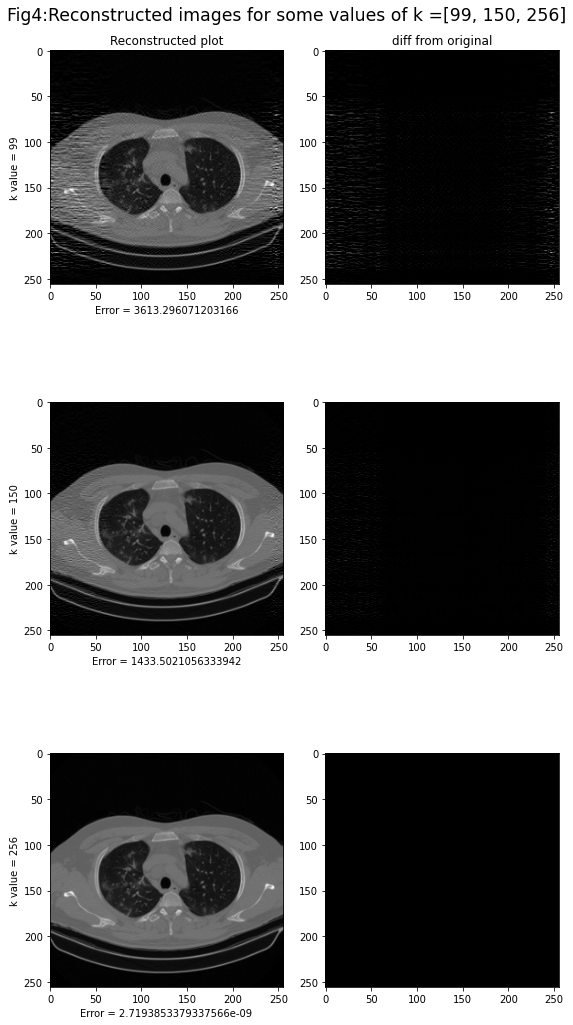

In [30]:
from matplotlib import axes
#x1 contains all the benign k-values that we can consider
k_list1=[10,25,50] #sample values to plot
k_list2=[99,150,256]

def plot_evd(k_list):
  fig,axarr = plt.subplots(nrows=3,ncols=2,figsize=(8,15))
  i=0
  for k in k_list:
    img_rct1 = evd_rct(test_img,k)[2]
    axarr[i,0].imshow(np.real(img_rct1),cmap='gray',vmin=0,vmax=255)
    axarr[i,0].set(xlabel="Error = "+str(np.linalg.norm(np.real(img_rct1)-test_img,'fro')),ylabel="k value = "+str(k))
    if i==0:
      axarr[0,0].set_title("Reconstructed plot")
    axarr[i,1].imshow(test_img-np.real(img_rct1),cmap='gray',vmin=0,vmax=255)
    if i==0:
      axarr[0,1].set_title("diff from original")
    i=i+1
  fig.suptitle("Fig4:Reconstructed images for some values of k ="+str(k_list),size='xx-large')
  fig.tight_layout()
  fig.show()

plot_evd(k_list1)
plot_evd(k_list2)

Text(0.5, 1.0, '8006.328477823039')

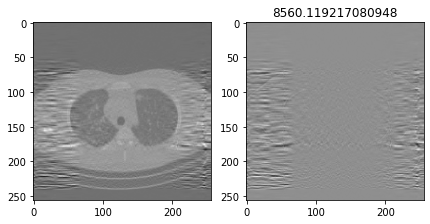

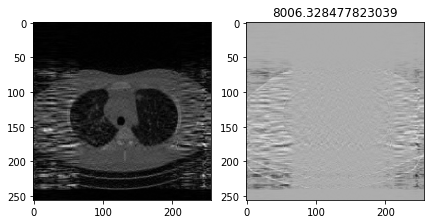

In [ ]:
img_rct1=evd_rct(test_img,int(len(x1)/4))[2]
plt.figure(figsize=(7,5))
plt.subplot(121)
plt.imshow(np.real(img_rct1),cmap='gray')
plt.subplot(122)
plt.imshow(test_img-np.real(img_rct1),cmap='gray')
plt.title(np.linalg.norm(np.real(img_rct1)-test_img,'fro'))
plt.figure(figsize=(7,5))
plt.subplot(121)
plt.imshow(np.absolute(img_rct1),cmap='gray')
plt.subplot(122)
plt.imshow(test_img-np.absolute(img_rct1),cmap='gray')
plt.title(np.linalg.norm(np.absolute(img_rct1)-test_img,'fro'))


In [31]:

fnorm_evd=[]

for x in x1:
  fnorm_evd.append(np.linalg.norm(np.real(evd_rct(test_img,x)[2])-test_img,'fro'))



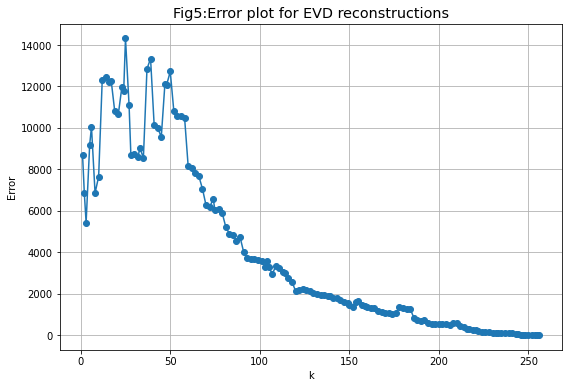

In [34]:
plt.figure(figsize=(9,6))
plt.plot(x1,fnorm_evd,marker='o')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Fig5:Error plot for EVD reconstructions",size='x-large')
plt.grid()

# SVD

Text(0.5, 1.0, 'Fig2: Plot of singular values(descending order) in log-scale')

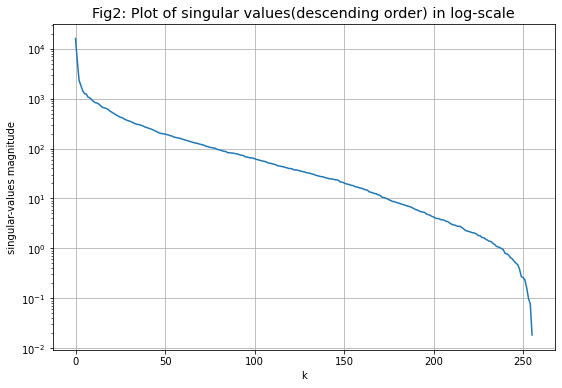

In [89]:
def img_rct_svd(A,k=10):
  A_t= np.transpose(A)
  left_m = np.dot(A,A_t)
  right_m=np.dot(A_t,A)
  sing_vals = np.sqrt(np.linalg.eigh(left_m)[0][::-1],dtype = np.float64)
  right_eig_vec = np.transpose(np.linalg.eigh(right_m)[1][:,::-1])
  sing_vals_inv = sing_vals.copy()
  sing_vals_inv[np.where(sing_vals!=0)] = 1/sing_vals_inv[np.where(sing_vals!=0)]
  left_eig_vec = np.dot(A,np.dot(np.transpose(right_eig_vec),np.diag(sing_vals_inv)))
  rst_img = np.dot(left_eig_vec[:,:k],np.diag(sing_vals[:k]))
  rst_img = np.dot(rst_img, right_eig_vec[:k,:])
  return [left_eig_vec,sing_vals,right_eig_vec,rst_img]
  
singvals = img_rct_svd(test_img)[1]
plt.figure(figsize=(9,6))
plt.plot(np.absolute(singvals))
plt.yscale('log')
plt.xlabel("k")
plt.ylabel("singular-values magnitude")
plt.grid()
plt.title("Fig2: Plot of singular values(descending order) in log-scale",size='x-large')

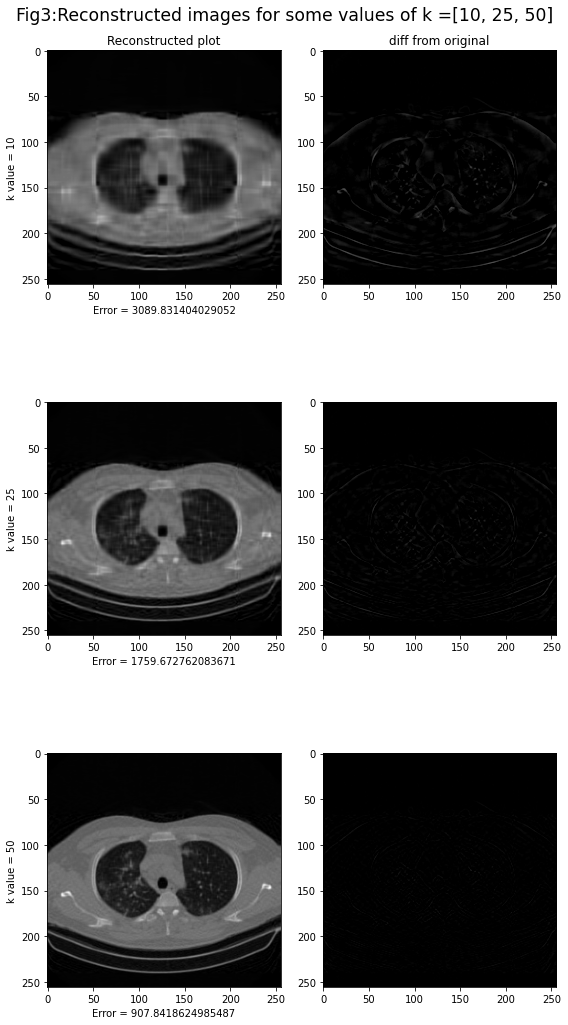

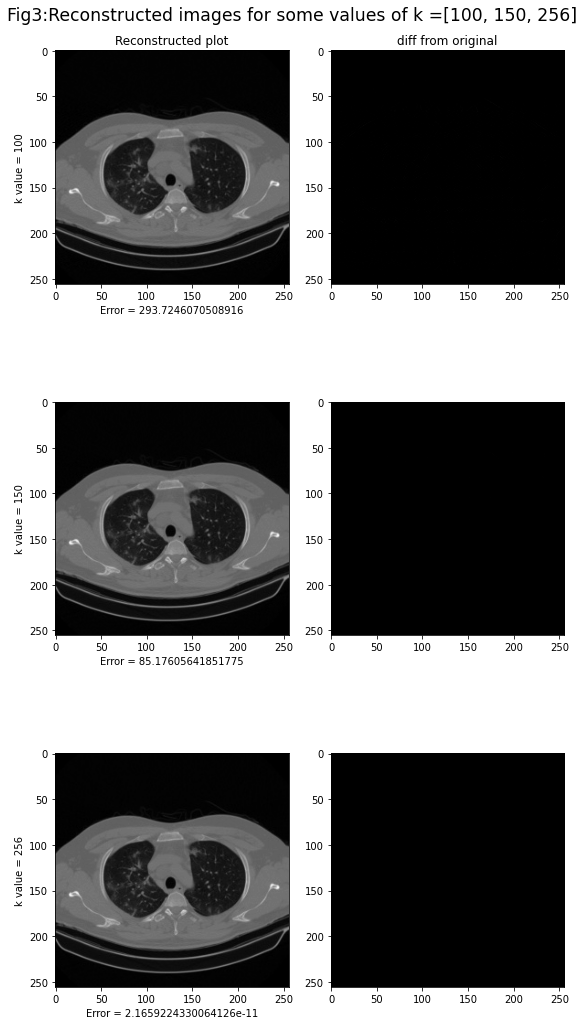

In [90]:


from matplotlib import axes
#x1 contains all the benign k-values that we can consider
k_list1=[10,25,50] #sample values to plot
k_list2=[100,150,256]

def plot_svd(k_list):
  fig,axarr = plt.subplots(nrows=3,ncols=2,figsize=(8,15))
  i=0
  for k in k_list:
    img_rct1 = img_rct_svd(test_img,k)[3]
    axarr[i,0].imshow(np.real(img_rct1),cmap='gray',vmin=0,vmax=255)
    axarr[i,0].set(xlabel="Error = "+str(np.linalg.norm(np.real(img_rct1)-test_img,'fro')),ylabel="k value = "+str(k))
    if i==0:
      axarr[0,0].set_title("Reconstructed plot")
    axarr[i,1].imshow(test_img-np.real(img_rct1),cmap='gray',vmin=0,vmax=255)
    if i==0:
      axarr[0,1].set_title("diff from original")
    i=i+1
  fig.suptitle("Fig3:Reconstructed images for some values of k ="+str(k_list),size='xx-large')
  fig.tight_layout()
  fig.show()

plot_svd(k_list1)
plot_svd(k_list2)

#[U,D,V]=np.linalg.svd(A)
#img_app = np.matmul(U[:,:k],eig_vals[:k,np.newaxis]*V[:k,:])
#plt.figure()
#plt.imshow(img_app,cmap='gray')
#print(np.linalg.norm(img_app-test_img,'fro')/np.linalg.norm(test_img,'fro'))


In [91]:
fnorm = []
for x in range(1,257):
  fnorm.append(np.linalg.norm(img_rct_svd(test_img,x)[3]-test_img,'fro'))


Text(0.5, 1.0, 'Fig4: Error plot for SVD reconstructions')

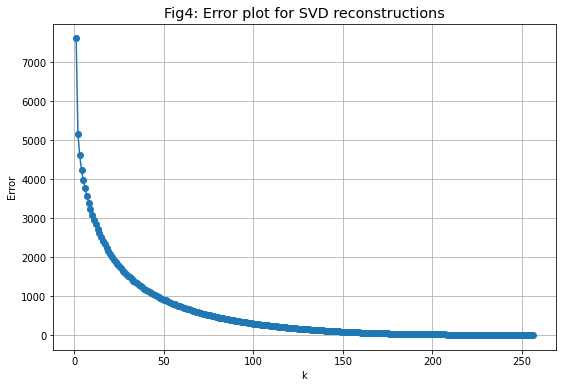

In [92]:
plt.figure(figsize=(9,6))
plt.plot(range(1,257),fnorm,marker='o')
plt.grid()
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Fig4: Error plot for SVD reconstructions",size='x-large')

In [93]:
color_img = plt.imread('lena.png')
color_img = np.array(color_img,dtype = np.float64)

Text(0.5, 1.0, 'Fig5: Original Color Image')

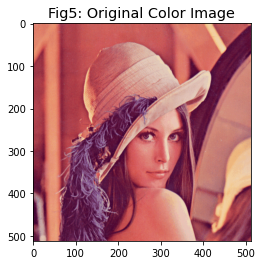

In [94]:
plt.imshow(color_img)
plt.title("Fig5: Original Color Image",size='x-large')

In [11]:
color_img.shape

(512, 512, 3)

In [97]:
R = color_img[:,:,0]
G = color_img[:,:,1]
B = color_img[:,:,2]
zeros = np.zeros(color_img.shape)
Norm = np.linalg.norm(R,'fro')+np.linalg.norm(G,'fro')+np.linalg.norm(B,'fro')
Norm

802.6353665278186

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


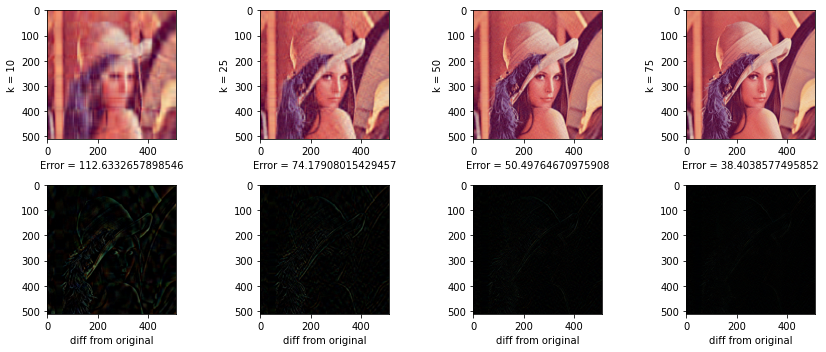

In [99]:
k_list = [10,25,50,75]
img = np.zeros(color_img.shape)
fig,axarr = plt.subplots(2,4,figsize=(12,5))
i=0
for k in k_list:
  img[:,:,0] = img_rct_svd(R,k)[3]
  img[:,:,1] = img_rct_svd(G,k)[3]
  img[:,:,2] = img_rct_svd(B,k)[3]
  axarr[0,i].imshow(img)
  axarr[0,i].set(xlabel="Error = "+str(np.linalg.norm(R-img[:,:,0],'fro')+np.linalg.norm(G-img[:,:,1],'fro')+np.linalg.norm(B-img[:,:,2],'fro')),ylabel='k = '+str(k))
  axarr[1,i].imshow(color_img-img)
  axarr[1,i].set(xlabel="diff from original")
  i=i+1
#fig.suptitle("Fig6: Reconstructed color images",size='xx-large')
fig.tight_layout()

End of code....

In [29]:
list=np.array([[1,2,3],[4,5,0],[8,9,0]],dtype=np.float64)

list[np.where(list!=0)]=1/list[np.where(list!=0)]
np.c_[list,list]

array([[1.        , 0.5       , 0.33333333, 1.        , 0.5       ,
        0.33333333],
       [0.25      , 0.2       , 0.        , 0.25      , 0.2       ,
        0.        ],
       [0.125     , 0.11111111, 0.        , 0.125     , 0.11111111,
        0.        ]])